# Home Assignment No. 2 - part one

To solve this task, you will write a lot of code to try several deep learning approaches.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [pytorch](https://pytorch.org/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, the whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `pytorch` and `torchvision` libraries instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed`, i.e., to use `torch.manual_seed(...)` and `np.random.seed(...)`.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Remember to use **GPU** computations in `pytorch`. For this, you have to write `model.cuda()`, `tensor.cuda()` to put your model/tensor to GPU. If you do not want to have an easy life, you may compute everything on **CPU** (default).

* If you have **multiple** GPUs available, you may call `torch.cuda.set_device(DEVICE_ID)` to specify the particular  GPU device to be used. Also, you are allowed to use `torch.nn.DataParallel(...)` to compute on multiple GPUs but a **single Google Colab GPU is enough for each task**.


## Task 1. Toy Deep Learning. (3 points)

-  **(1 pt.)** Activation functions; **(subtask 1.1)**
-  **(2 pt.)** MNIST classification.  **(subtask 1.2)**



### Subproblem 1.1  Activation functions. 
Plot the following [activation functions](https://pytorch.org/docs/master/nn.html#non-linear-activation-functions) using their PyTorch implementation and their derivatives using [autograd](https://pytorch.org/docs/stable/autograd.html) functionality `grad()`:
   
**1.1.1) Plot `ReLU`, `ELU` ($\alpha = 1$), `Softplus` ($\beta = 1$) and `Sign`, `Sigmoid`, `Softsign`, `Tanh`.**


EXPECTED OUTPUT FORMAT


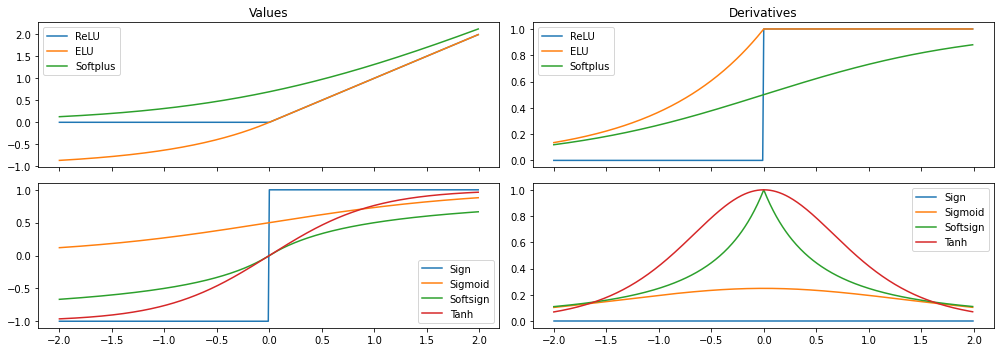

In [ ]:
%matplotlib inline
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torch

x = torch.arange(-2, 2, .01, requires_grad=True)
x_np = x.detach().numpy()
x.sum().backward() # to create x.grad

f, axes = plt.subplots(2, 2, sharex=True, figsize=(14, 5))
axes[0, 0].set_title('Values')
axes[0, 1].set_title('Derivatives')

names = []

for i, function_set in (0, (('ReLU', F.relu), ('ELU', F.elu), ('Softplus', F.softplus))), \
                       (1, (('Sign', torch.sign), ('Sigmoid', torch.sigmoid), ('Softsign', F.softsign), ('Tanh', torch.tanh))):
    for function_name, activation in function_set:
        ### BEGIN Solution (do not delete this comment)
        # >>> your solution here <<<
        x.grad.zero_()
        y = activation(x)
        y_np = y.detach().numpy()
        y.sum().backward()
        yd_np = x.grad.detach().numpy()

        axes[i,0].plot(x_np,y_np,label=function_name)
        axes[i,1].plot(x_np,yd_np,label=function_name)
        ### END Solution (do not delete this comment)

    axes[i, 0].legend()
    axes[i, 1].legend()
print('EXPECTED OUTPUT FORMAT')
plt.tight_layout()
plt.show()

**4.1.2) Which of these functions may be, and which - definitely, are a poor choise as an activation function in a neural network? Why? Do not forget that output of the current layer servers as an input for the following one. Imagine a situation where we have many layers, what happens with the activation values?**







**Your text answer (do not delete this comment)**:
*   ReLU has its pros and cons: The gradient is easy to compute, but problems may occur if all inputs are less than zero, as gradient and function itself will be equal to zero in such case, which leads to dying neuron, but this problem rarely occurs. Also strictly speaking not differentiable at zero,as well as not limited, so it may happen that the value of activation will be large. Also the gradient has no connection with the value of input.
*   ELU is differentiable at zero, but other problems as for ReLU remains
*   Softplus is also differentiable everywhere, has smooth derivative equal to sigmoid, but is computationally expensive, which makest it no the best choice
*   Sign is not a good choice as there is now gradient for his function, therefore network will not be able to learn
*   Sigmoid is a good choice for receiving probabilities, there is no problem with large value of activation, but this function has gradient vanishing problem as it changes insufficiently when far from zero. Also might lead to zero output for negative inputs. Computationally more expensive than ReLU
*   Tanh has no problem with large outputs,not biased towards positive outputs, yet has the same problems as sigmoid with gradient vanishing.Computationally more expensive than ReLU
Therefore the choices one may consider are ReLU,ELU,sigmoid and tanh. But still it is important to remember possible problems and particular problems of these fucntions in order to correctly apply them.

### Task 1.2 MNIST classification. 

At one of the seminars we have discussed an MLP (Multilayer perceptron) with one hidden layer, logistic activation functions and softmax. In this task, you will need to:

1. Implement the MLP modules, including the Softmax cross entropy between `logits` and `labels` using numpy.

2.  Train your numpy realization of MLP to classify MNIST from `sklearn.datasets()`. The required accuracy on validation is `> 90%`.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [ ]:
# fetch the dataset.
digits, targets = load_digits(return_X_y=True)
digits = digits.astype(np.float32) / 255

digits_train, digits_test, targets_train, targets_test = train_test_split(digits, targets, random_state=0)

train_size = digits_train.shape[0]
test_size = digits_test.shape[0]

input_size = 8*8
classes_n = 10

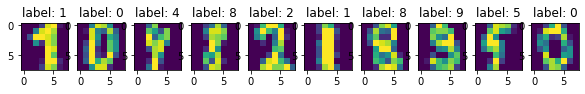

In [ ]:
N = 10

sample_idx = np.random.choice(1797, N, replace=False)
digits_sample = digits[sample_idx]
targets_sample = targets[sample_idx]
f, ax  = plt.subplots(1,10, figsize=(10, 5))

for i in range(N):
    ax[i].imshow(digits_sample[i].reshape(8,8))
    ax[i].set_title('label: '+str(targets_sample[i]))


A short recap on what we are going to achieve here.
<br>
1. Forward pass:
$$
h_1 = X\theta_1+\beta_1
$$

$$
O_1 = sig(h_1)
$$

$$
h_2 = O_1\theta_2+\beta_2
$$
$$
O_2 = softmax(h_2)
$$
$$
Loss = CrossEntropy(O_2, true \space labels)
$$

2. Compute gradients: 

To update weights first we need to compute loss gradients with respect to $\theta_1$ and $\theta_2$ and then update both $\theta$ and $\beta$.

$$
\frac{ \partial{loss} }{\partial{\theta_2}} = \frac{ \partial{loss} }{\partial{O_2}}\frac{ \partial{O_2} }{\partial{h_2}}\frac{ \partial{h_2} }{\partial{\theta_2}}
$$
Note, that $\frac{ \partial{h_2} }{\partial{\theta_2}}=O_1$, so we can cache this value during forward pass to speed up our computation.
$$
\frac{ \partial{loss} }{\partial{\theta_1}} = \frac{ \partial{loss} }{\partial{O_2}}\frac{ \partial{O_2} }{\partial{h_2}}\frac{ \partial{h_2} }{\partial{O_1}}\frac{ \partial{O_1} }{\partial{h_1}}\frac{ \partial{h_1} }{\partial{\theta_1}}
$$
Note, that $\frac{ \partial{h_1} }{\partial{\theta_1}}=X$.

Since we are using sigmoid avtivation function here and
$$
\frac{ \partial{sig} }{\partial{h}} = sig(h)(1 - sig(h))
$$
It also makes sense to cache sig(h) during forward pass.

3. Update weights:

$\theta:= \theta -  \frac{ \partial{loss} }{\partial{\theta}}\alpha$, where $\alpha$ is some learning rate.

Note, it was not shown here how to update and compute $\beta$ but you can do it!

**4.2.1) Implement the MLP with backprop**

Here you should implement an MLP class and its constituents including forward and backward propagation methods.

In [ ]:

class Linear:
    def __init__(self, input_size, output_size):
        # Trainable parameters of the layer and their gradients
        self.thetas = np.random.randn(input_size, output_size) # the weight matrix of the layer (W)
        self.thetas_grads = np.empty_like(self.thetas) # gradient w.r.t. the weight matrix of the layer
        self.bias = np.random.randn(output_size) # bias terms of the layer (b)
        self.bias_grads = np.empty_like(self.bias) # gradient w.r.t. bias terms of the linear layer

    def forward(self, x): 
        # keep x for backward computation
        self.x = x
        output = np.matmul(x, self.thetas) + self.bias
        return output
    
    def backward(self, output_grad, learning_rate):
        """
        Calculate and return gradient of the loss w.r.t. the input of linear layer given the input x and the gradient 
        w.r.t output of linear layer. You should also calculate and update gradients of layer parameters.
        :param x: np.array, input tensor for linear layer;
        :param output_grad: np.array, grad tensor w.r.t output of linear layer;
        :return: np.array, grad w.r.t input of linear layer
        """
        
        ### BEGIN Solution (do not delete this comment)

        # >>> your solution here <<<
        input_grad = output_grad @ self.thetas.T
        self.thetas_grads = self.x.T @ output_grad
        self.bias_grads = output_grad.reshape((-1))

        self.step(learning_rate)
        ### END Solution (do not delete this comment!)
        
        return input_grad

    def step(self, learning_rate):
        self.thetas -= self.thetas_grads * learning_rate
        self.bias -= self.bias_grads * learning_rate

class LogisticActivation:
    def __init__(self):
        # the layer has no parameters
        pass 
        
    def sig(self, x):
        return 1/(1 + np.exp(-x))

    def forward(self, x):
        # keep o for backward computation
        self.o = self.sig(x)
        return self.o 


    def backward(self,  output_grad, learning_rate=None):
        """
        Calculate and return the gradient of the loss w.r.t. the input
        of logistic non-linearity (given input x and the gradient 
        w.r.t output of logistic non-linearity).
        
        :param x: np.array, input tensor for logistic non-linearity;
        :param output_grad: np.array, grad tensor w.r.t output of logistic non-linearity;
        :return: np.array, grad w.r.t input of logistic non-linearity
        
        """
        
        ### BEGIN Solution (do not delete this comment!)

        # >>> your solution here <<<
        input_grad = (1-self.o)*self.o * output_grad

        ### END Solution (do not delete this comment!)
        
        return input_grad


class MLP:
    def __init__(self, input_size, hidden_layer_size, output_size):
        self.linear1 = Linear(input_size, hidden_layer_size)
        self.activation1 = LogisticActivation()
        self.linear2 = Linear(hidden_layer_size, output_size)
        
    def forward(self, x):
        h1 = self.linear1.forward(x)
        h1a = self.activation1.forward(h1)
        out = self.linear2.forward(h1a)
        return out

    def backward(self, output_grad, learning_rate):
        """
        Calculate and return the gradient of the loss w.r.t. the input of MLP given the input and the gradient 
        w.r.t output of MLP. You should also update gradients of paramerters of MLP layers.
        Hint - you should chain backward operations of modules you have already implemented. You may also
        need to calculate intermediate forward results.
        
        :param x: np.array, input tensor for MLP;
        :param output_grad: np.array, grad tensor w.r.t output of MLP;
        :return: np.array, grad w.r.t input of MLP
        """
 
        ### BEGIN Solution (do not delete this comment!)

        # >>> your solution here <<<
        lin2_input_grad = self.linear2.backward(output_grad,learning_rate)
        sig_inp_grad = self.activation1.backward(lin2_input_grad)
        out = self.linear1.backward(sig_inp_grad,learning_rate)

        ### END Solution (do not delete this comment!)
        

        return  out


In [ ]:
def softmax_crossentropy_with_logits(logits, reference_answers):
    
    ### BEGIN Solution (do not delete this comment!)

    # >>> your solution here <<<
    labels = np.zeros_like(logits)
    labels[:,reference_answers] = 1
    softmax = np.exp(logits)/np.exp(logits).sum()
    loss = -labels * np.log(softmax)
    loss = loss.sum()

    ### END Solution (do not delete this comment!)
    
    return loss

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    
    ### BEGIN Solution (do not delete this comment!)
    labels = np.zeros_like(logits)
    labels[:,reference_answers] = 1
    softmax = np.exp(logits)/np.exp(logits).sum()
    # >>> your solution here <<<
    grad = softmax - labels
    ### END Solution (do not delete this comment!)

    return grad

In [ ]:
np.random.seed(42)

mlp = MLP(input_size=input_size, hidden_layer_size=100, output_size=classes_n)

epochs_n = 100
learning_curve = [0] * epochs_n
test_curve = [0] * epochs_n

x_train = digits_train
x_test = digits_test
y_train = targets_train
y_test = targets_test

learning_rate = 1e-2

for epoch in range(epochs_n):
    
    y_pred = []

    for sample_i in range(train_size):
        x = x_train[sample_i].reshape((1, -1))
        target = np.array([y_train[sample_i]])
        logits = mlp.forward(x)

        ### BEGIN Solution (do not delete this comment!)
        
        # ... perform forward pass and compute the loss
        # ... compute the gradients w.r.t. the input of softmax layer
        # ... perform backward pass
        # ... and update the weights with weight -= grad * learning_rate
        # >>> your solution here <<<
        loss = softmax_crossentropy_with_logits(logits,target)

        grad = grad_softmax_crossentropy_with_logits(logits,target)

        mlp.backward(grad,learning_rate)
        
        ### END Solution (do not delete this comment!)

        y_pred.extend(logits.argmax(1))

    if epoch % 10 == 0:
        
        y_pred_test = []

        for sample_i in range(test_size):
            x = x_test[sample_i].reshape((1, -1))
            target = np.array([y_test[sample_i]])
            
            logits = mlp.forward(x)
            y_pred_test.extend(logits.argmax(1))

        print('Starting epoch {}'.format(epoch), \
              ', Loss : {:.3}'.format(loss), \
              ', Accuracy on train: {:.3}'.format(accuracy_score(y_train, y_pred)), \
              ', Accuracy on test: {:.3}'.format(accuracy_score(y_test, y_pred_test)) )

Starting epoch 0 , Loss : 2.71 , Accuracy on train: 0.103 , Accuracy on test: 0.0667
Starting epoch 10 , Loss : 2.15 , Accuracy on train: 0.625 , Accuracy on test: 0.649
Starting epoch 20 , Loss : 1.55 , Accuracy on train: 0.821 , Accuracy on test: 0.807
Starting epoch 30 , Loss : 1.07 , Accuracy on train: 0.875 , Accuracy on test: 0.871
Starting epoch 40 , Loss : 0.742 , Accuracy on train: 0.9 , Accuracy on test: 0.889
Starting epoch 50 , Loss : 0.534 , Accuracy on train: 0.911 , Accuracy on test: 0.904
Starting epoch 60 , Loss : 0.399 , Accuracy on train: 0.92 , Accuracy on test: 0.924
Starting epoch 70 , Loss : 0.308 , Accuracy on train: 0.927 , Accuracy on test: 0.931
Starting epoch 80 , Loss : 0.245 , Accuracy on train: 0.929 , Accuracy on test: 0.931
Starting epoch 90 , Loss : 0.198 , Accuracy on train: 0.936 , Accuracy on test: 0.933


**1.2.2) Print the confusion matrix between your predictions and true values.**

In [ ]:
# BEGIN Solution (do not delete this comment!)

# >>> your solution here <<<
print('Confusion matrix for train\n',confusion_matrix(y_train,y_pred))

print('Confusion matrix for test\n',confusion_matrix(y_test,y_pred_test))

# END Solution (do not delete this comment!)

Confusion matrix for train
 [[139   0   0   0   1   1   0   0   0   0]
 [  0 126   1   0   0   0   0   0   3   9]
 [  0   1 130   2   0   0   0   0   0   0]
 [  0   3   2 125   0   1   0   4   3   0]
 [  1   2   0   0 135   0   0   1   2   2]
 [  0   0   0   0   1 127   1   0   0   5]
 [  0   2   0   0   1   1 125   0   0   0]
 [  0   0   0   0   0   0   0 129   1   1]
 [  0  10   1   1   0   2   1   0 109   2]
 [  0   1   0   1   0   1   0   4   4 122]]
Confusion matrix for test
 [[37  0  0  0  0  0  0  0  0  0]
 [ 0 39  0  0  0  0  2  0  0  2]
 [ 0  2 40  1  0  0  0  1  0  0]
 [ 0  0  0 42  0  0  0  1  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  0  0  0  0 48  0  0]
 [ 0  4  1  0  0  1  0  1 41  0]
 [ 0  0  0  4  0  2  0  1  1 39]]


## Task 2. CIFAR-10 Classification (10 points)
**From now on we will be using pytorch for all the tasks.**

We will create a 10-class classifier on the popular [CIFAR-10](https://pytorch.org/vision/stable/datasets.html#cifar) dataset.

1. **(1 pt.)**  Load the dataset. Prepare dataloaders (train, test). Visualize images. (**Subproblem 2.1**)

2. **(2 pt.)**  Prepare the training procedure. Train a simple linear classifier `clf_lr`. (**Subproblem 2.2**)

3. **(2 pt.)**  Define, train and evaluate a sequential fully-connected classifier `clf_mlp`. (**Subproblem 2.3**)

4. **(3 pt.)**  Define, train and evaluate a convolutional + fully-connected classifier `clf_cnn`. (**Subproblem 2.4**)

5. **(2 pt.)**  Define, train and evaluate a deep neural network classifier `clf` from [torchvision.models](https://pytorch.org/vision/stable/models.html). (**Subproblem 2.5**)

To get points for subtasks 3-5, it is **mandatory** to succesfully complete preparation subtasks 1, 2.

In [2]:
### BEGIN Solution (do not delete this comment!)

# >>> your imports here <<<

import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from torch.utils.data import DataLoader
from torch import nn
from tqdm import tqdm

torch.manual_seed(17)
### END Solution (do not delete this comment!)

### Subproblems 2.1. Dataloaders.

<img width=350 src="https://ak.picdn.net/shutterstock/videos/1039407446/thumb/1.jpg">

**2.1.1) Here you have to load CIFAR-10 dataset. For this, you have to**
1. Create two composite [transform](https://pytorch.org/vision/stable/transforms.html#compositions-of-transforms) operations (`train_transform`, `test_transform`) to augment/normalize the data (random crops, rotations, etc.):
- On the train set, you are free to compose any transforms you want. It is not mandatory to use any transforms (except for `ToTensor`), but without proper data augmentation you will probably struggle to train classifier in the following tasks.
- On the test set, we may use only `Normalization` and `ToTensor`. If you use normalization, make sure it is the same on both train and test parts.
2. Load the train and test parts (`train_set`, `test_set`) of the [CIFAR-10 dataset](https://pytorch.org/vision/stable/datasets.html#cifar) which use the transforms that you prepared.
3. Prepare train and test [dataloaders](https://pytorch.org/docs/stable/data.html) (`train_loader`, `test_loader`) which load the respective datasets. Use some batch size $\in[8, 128]$.

In [4]:
### BEGIN Solution (do not delete this comment)

# >>> your solution here <<<



train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.25,0.25,0.25)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20),
    transforms.GaussianBlur(kernel_size=(1, 3), sigma=(0.1, 2)),
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.25,0.25,0.25))
])

train_set = torchvision.datasets.CIFAR10(root='./data',download=True,train=True,
                                         transform=train_transform)
train_loader = DataLoader(train_set,batch_size=128,shuffle=True)

test_set = torchvision.datasets.CIFAR10(root='./data',download=True,train=False,
                                        transform=test_transform)
test_loader = DataLoader(test_set,batch_size=128,shuffle=True)

### END Solution (do not delete this comment)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print('Train size', len(train_set))
print('Test size', len(test_set))

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Train size 50000
Test size 10000


**2.1.2) Now write a function** which takes a dataloader and plots a **random batch** of images with their **true labels**. If the pre-processing in your dataloaders contains normalization, you **must** perform inverse normalization in order to make the colors look natural. You also have to remove the ticks/labels of axes from each subplot and assign a title to each subplot based on the image's class. Visualizing images helps to check that the preprocessing you do is meaningful.

In [ ]:
def plot_random_images(loader):
    # BEGIN Solution (do not delete this comment!)
    
    # >>> your solution here <<<
    np.random.seed(42)
    
    N = 8
    mean = 0.5
    std = 0.25

    fig,axes = plt.subplots(1,N,figsize=(16,8))
    
    images,labels =  next(iter(loader))
    rnd_idx = np.random.choice(len(images),N,replace=False)

    for ax,idx in zip(axes,rnd_idx):
      img = images[idx].numpy()
      label = labels[idx]
      img = img * std + mean
      ax.imshow(np.transpose(img,(1,2,0)))
      ax.set_title(classes[label])
      ax.axis('off')
    plt.show()
    # END Solution (do not delete this comment!)

**2.1.3) Plot random train and test images.**

Train (augmented) images.


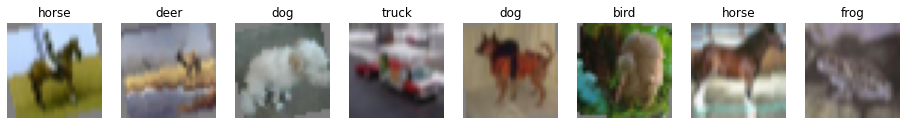

In [ ]:
print('Train (augmented) images.')
plot_random_images(train_loader)

Test images (no augmentation).


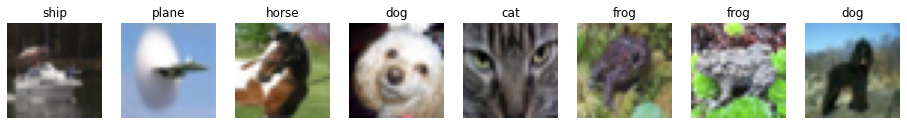

In [ ]:
print('Test images (no augmentation).')
plot_random_images(test_loader)

### Subtask 2.2. Training procedure + linear classification ($\geq$38%)
**2.2.1) Now we are ready to write the code for training & evaluation. You have to prepare 2 following procedures:**
1. `epoch_train` has to perform 1 training epoch. It should iterate the given `loader`. For each batch it should compute the loss of the `clf` model by `criterion` and perform the gradient step by using the model optimizer `opt`. The function should return **2 values** -- average loss on batches during training and average accuracy of prediction.
2. `epoch_test` has to perform 1 evaluation epoch. It should do the same as `epoch_train` but without performing optimization of `clf` model.

At the beginning of `epoch_train` and `epoch_test` it is necessary to call `clf.train(True)` and `clf.eval()` respectively. This will change the behaviour of dropout/batchnorm layers to the one required during the procedure (training/evaluation). For more details, see this [post](https://stackoverflow.com/questions/51433378/what-does-model-train-do-in-pytorch).

In [7]:
def epoch_train(loader, clf, criterion, opt):
    # BEGIN Solution (do not delete this comment!)
    
    # >>> your solution here <<<

    device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
    clf.train()
    
    epoch_loss = 0
    epoch_correct = 0
    total = 0
    for data, targets in loader:
      
      model_input = data.to(device)
      targets = targets.to(device)

      total += targets.shape[0]

      clf_output = clf(model_input)
      
      loss = criterion(clf_output,targets)
      epoch_loss += loss.item()

      epoch_correct += torch.sum(targets==clf_output.argmax(dim=1))

      opt.zero_grad()
      loss.backward()
      opt.step()

    avg_loss = epoch_loss/len(loader)
    avg_accuracy = epoch_correct/total

    return avg_loss,avg_accuracy
    # END Solution (do not delete this comment!)

def epoch_test(loader, clf, criterion):
    # BEGIN Solution (do not delete this comment!)

    # >>> your solution here <<<
    device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
    clf.eval()
    
    epoch_loss = 0
    epoch_correct = 0
    total = 0
    for data, targets in loader:
      
      model_input = data.to(device)
      targets = targets.to(device)

      total += targets.shape[0]

      clf_output = clf(model_input)
      
      loss = criterion(clf_output,targets)
      epoch_loss += loss.item()

      epoch_correct += torch.sum(targets==clf_output.argmax(dim=1))

    avg_loss = epoch_loss/len(loader)
    avg_accuracy = epoch_correct/total

    return avg_loss,avg_accuracy

    # END Solution (do not delete this comment!)

# The function which you are going to use for model training
def train(train_loader, test_loader, clf, criterion, opt, n_epochs=50):
    for epoch in tqdm(range(n_epochs)):
        train_loss, train_acc = epoch_train(train_loader, clf, criterion, opt)
        test_loss, test_acc = epoch_test(test_loader, clf, criterion)

        print(f'[Epoch {epoch + 1}] train loss: {train_loss:.3f}; train acc: {train_acc:.2f}; ' + 
              f'test loss: {test_loss:.3f}; test acc: {test_acc:.2f}')

Below we define a simple linear classifier which can be used to test the code above.

In [ ]:
class LINEAR(nn.Module):
    def __init__(self, num_classes=10):
        super(LINEAR, self).__init__()
        self.layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(32 * 32 * 3, num_classes)
        )
        
    def forward(self, x):
        return self.layers(x)
    
clf_lr = LINEAR(num_classes=10).cuda()
print('Number of weights:', np.sum([np.prod(p.shape) for p in clf_lr.parameters()]))

Number of weights: 30730


**2.2.2) Define the optimizer (use [SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html#torch.optim.SGD)) and the training criterion. As the training criterion for classification, please use the [CrossEntropy](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html).**

In [ ]:
# BEGIN Solution (do not delete this comment!)

# >>> your solution here <<<

opt = torch.optim.SGD(clf_lr.parameters(),lr=1e-3)
criterion = nn.CrossEntropyLoss()

# END Solution (do not delete this comment!)

Now train your linear classifier. It is mandatory to achieve the **final test accuracy $\geq$38%**. If you do not achieve this accuracy, try changing optimizer parameters (learning rate, momentum, weight decay), train data augmentation (subtask 8.1), batch size, number of training epochs.

In [ ]:
train(train_loader, test_loader, clf_lr, criterion, opt, n_epochs=20)

  5%|▌         | 1/20 [01:01<19:27, 61.43s/it]

[Epoch 1] train loss: 1.993; train acc: 0.29; test loss: 1.889; test acc: 0.33


 10%|█         | 2/20 [02:02<18:20, 61.15s/it]

[Epoch 2] train loss: 1.877; train acc: 0.35; test loss: 1.842; test acc: 0.36


 15%|█▌        | 3/20 [03:07<17:48, 62.83s/it]

[Epoch 3] train loss: 1.848; train acc: 0.36; test loss: 1.823; test acc: 0.36


 20%|██        | 4/20 [04:22<18:02, 67.64s/it]

[Epoch 4] train loss: 1.831; train acc: 0.37; test loss: 1.806; test acc: 0.37


 25%|██▌       | 5/20 [05:41<17:55, 71.73s/it]

[Epoch 5] train loss: 1.819; train acc: 0.38; test loss: 1.807; test acc: 0.37


 30%|███       | 6/20 [06:47<16:17, 69.79s/it]

[Epoch 6] train loss: 1.809; train acc: 0.38; test loss: 1.795; test acc: 0.38


 35%|███▌      | 7/20 [07:54<14:58, 69.08s/it]

[Epoch 7] train loss: 1.802; train acc: 0.39; test loss: 1.782; test acc: 0.38


 40%|████      | 8/20 [08:54<13:13, 66.13s/it]

[Epoch 8] train loss: 1.795; train acc: 0.39; test loss: 1.782; test acc: 0.38


 45%|████▌     | 9/20 [10:11<12:42, 69.35s/it]

[Epoch 9] train loss: 1.792; train acc: 0.39; test loss: 1.771; test acc: 0.39


 50%|█████     | 10/20 [11:28<11:58, 71.83s/it]

[Epoch 10] train loss: 1.786; train acc: 0.39; test loss: 1.776; test acc: 0.39


 55%|█████▌    | 11/20 [12:30<10:20, 68.90s/it]

[Epoch 11] train loss: 1.785; train acc: 0.39; test loss: 1.762; test acc: 0.39


 60%|██████    | 12/20 [13:32<08:52, 66.62s/it]

[Epoch 12] train loss: 1.780; train acc: 0.39; test loss: 1.769; test acc: 0.39


 65%|██████▌   | 13/20 [14:37<07:42, 66.13s/it]

[Epoch 13] train loss: 1.776; train acc: 0.39; test loss: 1.768; test acc: 0.39


 70%|███████   | 14/20 [15:37<06:25, 64.32s/it]

[Epoch 14] train loss: 1.774; train acc: 0.39; test loss: 1.761; test acc: 0.39


 75%|███████▌  | 15/20 [16:37<05:14, 62.94s/it]

[Epoch 15] train loss: 1.772; train acc: 0.40; test loss: 1.759; test acc: 0.39


 80%|████████  | 16/20 [17:37<04:08, 62.08s/it]

[Epoch 16] train loss: 1.771; train acc: 0.40; test loss: 1.758; test acc: 0.40


 85%|████████▌ | 17/20 [18:36<03:03, 61.23s/it]

[Epoch 17] train loss: 1.767; train acc: 0.40; test loss: 1.752; test acc: 0.39


 90%|█████████ | 18/20 [19:35<02:01, 60.64s/it]

[Epoch 18] train loss: 1.764; train acc: 0.40; test loss: 1.755; test acc: 0.39


 95%|█████████▌| 19/20 [20:35<01:00, 60.49s/it]

[Epoch 19] train loss: 1.764; train acc: 0.40; test loss: 1.755; test acc: 0.40


100%|██████████| 20/20 [21:35<00:00, 64.78s/it]

[Epoch 20] train loss: 1.762; train acc: 0.40; test loss: 1.746; test acc: 0.40


**2.2.3)** Explain which steps you have conducted (which architectures, optimizers, data augmentations, etc. you have tested) to obtain the final result. What were the most important changes in **hyperparameters** which helped to achieve the high score?

**Your text answer:** 

The first thing I tried is to use an enormous number of different tranformations on the train set. With this approach after training the accuracy of the model was not enough. So I thought that some transformation only make the train data worse. Firstly I got rid of vertical flip, as it seemed to be not a good idea to use. Also removed colorjitter and RandomAdgustSharpness as they hurt the images badly. I left Normalization,GaussianBlur,RandomHorizontalFlip. <br>
After this I added RandomRotation transformation with maximum angle of  rotation = 20. Such kind of the augmentations helped me to achieve the accuracy of 40%. <br>
So here the most important change was the change of the transformations applied to train data

### Subtask 2.3. Fully-connected classifier  ($\geq$63%)
**2.3.1)** Linear classifiers are doomed to provide poor performance on most image datasets. We make a step further and define a **multilayer perceptron** to classify CIFAR-10 images. You have to build a **sequential fully-connected network** satisfying the following requirements:
1. $\geq 2$ hidden fully-connected (linear) layers;
2. The network has ReLU activations;
3. There is $\geq 1$ Dropout layer in network;
4. There is $\geq 1$ BatchNorm1d layer layer in network;

**A toy image** of a fully-connected neural network.

<img width=450 src="https://www.researchgate.net/profile/Vikas-Ramachandra-2/publication/323467511/figure/fig3/AS:599172503834624@1519865265479/Figure-A-general-fully-connected-DNN-for-classification.png">

Note your network's input shape is `BATCH_SIZE x 3 x 32 x 32`, so you have to reshape the input tensor before feeding it to fully-connected layers. This can be done manually during `.forward()` or you may use `Flatten()` layer for this.

In [47]:
class MLP(nn.Module):
    def __init__(self, num_classes=10):
        super(MLP, self).__init__()
        self.layers = nn.Sequential(
            # BEGIN Solution (do not delete this comment!)

            # >>> your solution here <<<
          nn.Flatten(),
          nn.Linear(3*32*32,2000),
          nn.Dropout(),
          nn.ReLU(),
          nn.BatchNorm1d(2000),
          nn.Linear(2000,2000),
          nn.Dropout(),
          nn.ReLU(),
          nn.BatchNorm1d(2000),
          nn.Linear(2000,num_classes),
          nn.ReLU()
            # END Solution (do not delete this comment!)
        )
        
    def forward(self, x):
        return self.layers(x)
    
clf_mlp = MLP(num_classes=10).cuda()
print('Number of weights:', np.sum([np.prod(p.shape) for p in clf_mlp.parameters()]))

# Check that the output size of the network is BATCH_SIZE x NUM_CLASSES
X = next(iter(train_loader))[0].cuda()
with torch.no_grad():
    clf_X = clf_mlp(X)
    assert len(clf_X) == len(X)
    assert clf_X.shape[1] == 10

Number of weights: 10176010


**2.3.2) Now define the optimizer, criterion and train the network.** To obtain the points for this task, you must achieve **final test accuracy $\geq$63%**.

If you struggle to achieve this accuracy, try changing the architecture (stack more/less layers, make layers bigger/smaller, add more/less dropout, batchnorm layers), optimizer parameters, train data augmentation (subtask 5.1), batch size, number of training epochs, etc. SGD optimizer might not perform really well, so consider using [more advanced optimizers](https://pytorch.org/docs/stable/optim.html), e.g., `Adam`, `Adamax`, etc. Do not be afraid to stack more layers: it is ok if your net has millions of weights.

In [ ]:
# BEGIN Solution (do not delete this comment!)

# >>> your solution here <<<
torch.manual_seed(17)

train_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.25,0.25,0.25)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(20)
])
test_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.25,0.25,0.25))
])

train_set = torchvision.datasets.CIFAR10(root='./data',download=True,train=True,
                                         transform=train_transform)
train_loader = DataLoader(train_set,batch_size=128,shuffle=True)

test_set = torchvision.datasets.CIFAR10(root='./data',download=True,train=False,
                                        transform=test_transform)
test_loader = DataLoader(test_set,batch_size=128,shuffle=True)



opt = torch.optim.Adamax(clf_mlp.parameters(),lr=0.001)
criterion = nn.CrossEntropyLoss()

# END Solution (do not delete this comment!)

train(train_loader, test_loader, clf_mlp, criterion, opt, n_epochs=100)

Files already downloaded and verified
Files already downloaded and verified


  1%|          | 1/100 [00:48<1:19:33, 48.22s/it]

[Epoch 1] train loss: 1.813; train acc: 0.36; test loss: 1.563; test acc: 0.46


  2%|▏         | 2/100 [01:35<1:17:32, 47.48s/it]

[Epoch 2] train loss: 1.640; train acc: 0.42; test loss: 1.474; test acc: 0.48


  3%|▎         | 3/100 [02:22<1:16:47, 47.50s/it]

[Epoch 3] train loss: 1.578; train acc: 0.44; test loss: 1.449; test acc: 0.49


  4%|▍         | 4/100 [03:10<1:16:12, 47.63s/it]

[Epoch 4] train loss: 1.533; train acc: 0.46; test loss: 1.405; test acc: 0.51


  5%|▌         | 5/100 [03:58<1:15:37, 47.76s/it]

[Epoch 5] train loss: 1.498; train acc: 0.47; test loss: 1.369; test acc: 0.51


  6%|▌         | 6/100 [04:46<1:14:58, 47.86s/it]

[Epoch 6] train loss: 1.471; train acc: 0.48; test loss: 1.359; test acc: 0.52


  7%|▋         | 7/100 [05:35<1:14:44, 48.22s/it]

[Epoch 7] train loss: 1.444; train acc: 0.49; test loss: 1.327; test acc: 0.52


  8%|▊         | 8/100 [06:24<1:14:09, 48.37s/it]

[Epoch 8] train loss: 1.425; train acc: 0.49; test loss: 1.306; test acc: 0.53


  9%|▉         | 9/100 [07:11<1:12:51, 48.04s/it]

[Epoch 9] train loss: 1.408; train acc: 0.50; test loss: 1.295; test acc: 0.54


 10%|█         | 10/100 [07:58<1:11:39, 47.77s/it]

[Epoch 10] train loss: 1.388; train acc: 0.50; test loss: 1.282; test acc: 0.54


 11%|█         | 11/100 [08:46<1:10:41, 47.66s/it]

[Epoch 11] train loss: 1.374; train acc: 0.51; test loss: 1.273; test acc: 0.55


 12%|█▏        | 12/100 [09:33<1:09:49, 47.60s/it]

[Epoch 12] train loss: 1.361; train acc: 0.52; test loss: 1.258; test acc: 0.56


 13%|█▎        | 13/100 [10:21<1:09:13, 47.74s/it]

[Epoch 13] train loss: 1.348; train acc: 0.52; test loss: 1.258; test acc: 0.55


 14%|█▍        | 14/100 [11:08<1:08:14, 47.61s/it]

[Epoch 14] train loss: 1.332; train acc: 0.53; test loss: 1.237; test acc: 0.55


 15%|█▌        | 15/100 [11:56<1:07:14, 47.47s/it]

[Epoch 15] train loss: 1.322; train acc: 0.53; test loss: 1.230; test acc: 0.56


 16%|█▌        | 16/100 [12:43<1:06:25, 47.45s/it]

[Epoch 16] train loss: 1.310; train acc: 0.53; test loss: 1.216; test acc: 0.57


 17%|█▋        | 17/100 [13:31<1:05:39, 47.47s/it]

[Epoch 17] train loss: 1.304; train acc: 0.54; test loss: 1.226; test acc: 0.57


 18%|█▊        | 18/100 [14:18<1:04:48, 47.42s/it]

[Epoch 18] train loss: 1.294; train acc: 0.54; test loss: 1.222; test acc: 0.57


 19%|█▉        | 19/100 [15:06<1:04:26, 47.74s/it]

[Epoch 19] train loss: 1.290; train acc: 0.54; test loss: 1.200; test acc: 0.57


 20%|██        | 20/100 [15:54<1:03:35, 47.70s/it]

[Epoch 20] train loss: 1.277; train acc: 0.54; test loss: 1.196; test acc: 0.57


 21%|██        | 21/100 [16:41<1:02:32, 47.49s/it]

[Epoch 21] train loss: 1.269; train acc: 0.55; test loss: 1.201; test acc: 0.57


 22%|██▏       | 22/100 [17:28<1:01:39, 47.43s/it]

[Epoch 22] train loss: 1.268; train acc: 0.55; test loss: 1.193; test acc: 0.57


**2.3.3)** Explain which steps you have conducted (which architectures, optimizers, data augmentations, etc. you have tested) to obtain the final result. What were the most important changes in **hyperparameters** which helped to achieve the high score?

**Your text answer:** 


\<write your answer\>

### Subtask 2.4. CNN classifier  ($\geq$80%)
**2.4.1)** Multilayer perceptrons are good but on image datasets they typically perform worse than convolutional neural networks. In this subtask, you have to code a classical architecture of a neural network for classification: several fully convolutional layers ("*features*") followed by fully-connected ("*classifier*").
1. In the *features* part, you are allowed to use `Conv2d` (conv linear), pooling (`MaxPool2d`, `AvgPool2d`), dropout, batchnorm, activations.
2. In the *classifier* part, you are allowed to use `Linear` (dense linear), dropout, batchnorm, activations.

Do not be afraid to stack more layers. It is ok to consider large networks with dozens of millions of parameters. 

The following **example** image shows a potential variant of a network ([AlexNet](https://proceedings.neurips.cc/paper/2012/file/c399862d3b9d6b76c8436e924a68c45b-Paper.pdf) considers 1000-class classification of `3 x 224 x 224` images).

<img width=550 src="https://www.machinelearningmastery.ru/img/0-538121-698201.png">

In [ ]:
class CNN(nn.Module):
    def __init__(self, num_classes=10):
        super(CNN, self).__init__()
        self.features = nn.Sequential(
            # BEGIN Solution (do not delete this comment!)

            # >>> your solution here <<<

            # END Solution (do not delete this comment!)
        )
        self.classifier = nn.Sequential(
            # BEGIN Solution (do not delete this comment!)

            # >>> your solution here <<<

            # END Solution (do not delete this comment!)
        )

    def forward(self, x):
        # BEGIN Solution (do not delete this comment!)

        # >>> your solution here <<<
        
        # END Solution (do not delete this comment!)

In [ ]:
torch.cuda.set_device(0)
clf_cnn = CNN(num_classes=10).cuda()
print('Number of weights:', np.sum([np.prod(p.shape) for p in clf.parameters()]))
    
# Check that the output size of the network is BATCH_SIZE x NUM_CLASSES
X = next(iter(train_loader))[0].cuda()
with torch.no_grad():
    clf_X = clf_cnn(X)
    assert len(clf_X) == len(X)
    assert clf_X.shape[1] == 10

Number of weights: 23272266


**2.4.2) Now define the optimizer, criterion and train the network.** To get the points, you must achieve the **final test accuracy $\geq$80%**.

In [ ]:
# BEGIN Solution (do not delete this comment!)

# >>> your solution here <<<

opt = 
criterion = 

# END Solution (do not delete this comment!)

train(train_loader, test_loader, clf_cnn, criterion, opt, n_epochs=50)

[Epoch 1] train loss: 1.701; train acc: 0.35; test loss: 1.343; test acc: 0.51
[Epoch 2] train loss: 1.286; train acc: 0.54; test loss: 1.126; test acc: 0.60
[Epoch 3] train loss: 1.121; train acc: 0.60; test loss: 1.024; test acc: 0.64
[Epoch 4] train loss: 1.006; train acc: 0.64; test loss: 0.918; test acc: 0.68
[Epoch 5] train loss: 0.940; train acc: 0.67; test loss: 0.848; test acc: 0.70
[Epoch 6] train loss: 0.860; train acc: 0.70; test loss: 0.803; test acc: 0.72
[Epoch 7] train loss: 0.806; train acc: 0.72; test loss: 0.768; test acc: 0.73
[Epoch 8] train loss: 0.760; train acc: 0.74; test loss: 0.755; test acc: 0.74
[Epoch 9] train loss: 0.717; train acc: 0.75; test loss: 0.718; test acc: 0.75
[Epoch 10] train loss: 0.683; train acc: 0.76; test loss: 0.701; test acc: 0.76
[Epoch 11] train loss: 0.657; train acc: 0.77; test loss: 0.678; test acc: 0.76
[Epoch 12] train loss: 0.623; train acc: 0.78; test loss: 0.668; test acc: 0.77
[Epoch 13] train loss: 0.596; train acc: 0.79; te

**2.4.3)** Explain which steps you have conducted (which architectures, optimizers, data augmentations, etc. you have tested) to obtain the final result. What were the most important changes in **hyperparameters** which helped to achieve the high score?

**Your text answer:** \<write your answer\>

### Subtask 2.5. PyTorch classifier  ($\geq$83%)
**2.5.1)** After struggling to build the network manually, let us just import a pre-defined neural network architecture from `PyTorch` and train it. Take a look at the available [models](https://pytorch.org/vision/stable/models.html) of `torchvision.models`, pick the one you want and make it achieve $\geq 83$% **test accuracy**. We recommend to consider `VGG` or `ResNet` models. You **should not** use `pretrained=True` -- you job is to train the model from scratch.

An image of ResNet-34, plain and VGG-16 architectures.

![telegram-cloud-photo-size-4-5844643573331503502-w.jpg](attachment:telegram-cloud-photo-size-4-5844643573331503502-w.jpg)

<!-- <img width=750 src="https://miro.medium.com/max/1400/1*6hF97Upuqg_LdsqWY6n_wg.png"> -->

In [ ]:
# BEGIN Solution (do not delete this comment!)

# >>> your solution here <<<

clf = 
opt = 
criterion = 

# END Solution (do not delete this comment!)

In [ ]:
train(train_loader, test_loader, clf, criterion, opt, n_epochs=40)

[Epoch 1] train loss: 1.949; train acc: 0.20; test loss: 1.763; test acc: 0.28
[Epoch 2] train loss: 1.566; train acc: 0.39; test loss: 1.367; test acc: 0.47
[Epoch 3] train loss: 1.299; train acc: 0.52; test loss: 1.104; test acc: 0.60
[Epoch 4] train loss: 1.137; train acc: 0.59; test loss: 0.996; test acc: 0.65
[Epoch 5] train loss: 1.018; train acc: 0.64; test loss: 0.957; test acc: 0.66
[Epoch 6] train loss: 0.920; train acc: 0.68; test loss: 0.809; test acc: 0.71
[Epoch 7] train loss: 0.850; train acc: 0.71; test loss: 0.769; test acc: 0.73
[Epoch 8] train loss: 0.788; train acc: 0.73; test loss: 0.781; test acc: 0.74
[Epoch 9] train loss: 0.739; train acc: 0.75; test loss: 0.697; test acc: 0.76
[Epoch 10] train loss: 0.688; train acc: 0.76; test loss: 0.661; test acc: 0.78
[Epoch 11] train loss: 0.661; train acc: 0.78; test loss: 0.656; test acc: 0.78
[Epoch 12] train loss: 0.613; train acc: 0.79; test loss: 0.640; test acc: 0.79
[Epoch 13] train loss: 0.585; train acc: 0.80; te